# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related to the direct marketing campaigns of Portuguese bank, the marketing campaign is based on the phone calls to access if the bank deposit was subscribed or not.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



These features gives various kinds of information regarding the callers personal information like age, job, marital status, education and etc, other section of feature provide information about campaign type of contact, month, day and some other campaign related information, and the last section of features describes the social and economic context.

In [4]:
# Nubmer of non-null values in data frame.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It is important to find if there any missing values in the data, because some models won't work well and need to substitute value, or else discarded. Fortunately there are no null value in this data. 

In [5]:
# Finding nubmer of rows with unknown data
unknown_count = (df == 'unknown').sum()
print(f"Number of unknown: \n{unknown_count}")

Number of unknown: 
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [6]:
# unique values in each column

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: \n         {unique_values}")

job: 
         ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: 
         ['married' 'single' 'divorced' 'unknown']
education: 
         ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: 
         ['no' 'unknown' 'yes']
housing: 
         ['no' 'yes' 'unknown']
loan: 
         ['no' 'yes' 'unknown']
contact: 
         ['telephone' 'cellular']
month: 
         ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: 
         ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: 
         ['nonexistent' 'failure' 'success']
y: 
         ['no' 'yes']


In [7]:
# The following will provide the a summary of central tendency, dispersion, 
# and shape of the distribution of a dataset's columns.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Text(0.5, 1.0, 'Desired Target Destribution')

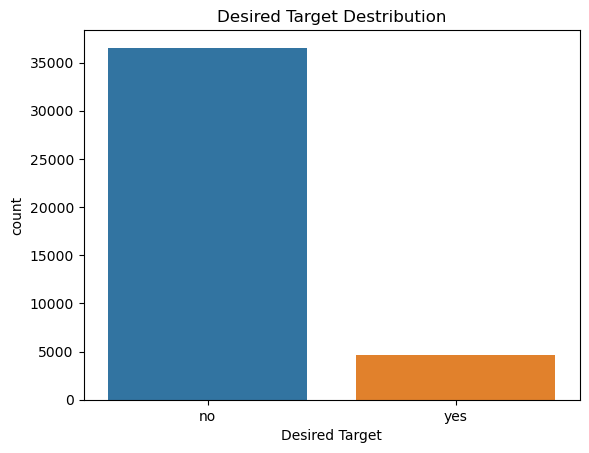

In [8]:
# Desired target destribution
sns.countplot(data = df, x = 'y')
plt.xlabel('Desired Target')
plt.title('Desired Target Destribution')

Text(0.5, 1.0, 'Distribution of Marital Status')

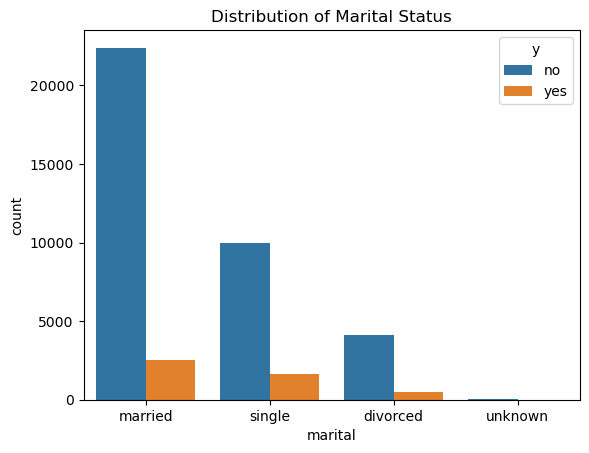

In [9]:
sns.countplot(data=df, x='marital', hue=df['y'])
plt.title('Distribution of Marital Status')

Text(0.5, 0, 'Desired Target')

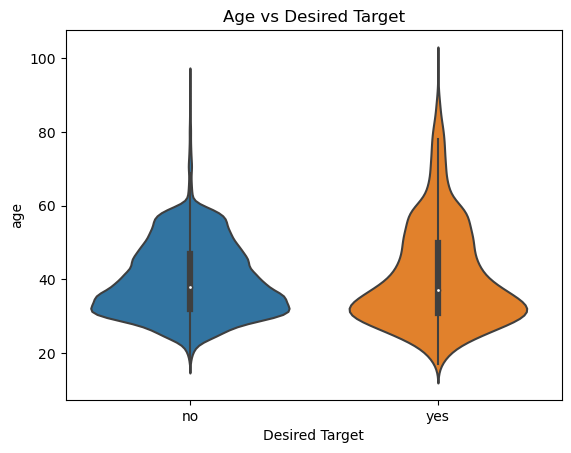

In [10]:
# violinplot of age against target
sns.violinplot(x='y', y='age', data=df)
plt.title('Age vs Desired Target')
plt.xlabel('Desired Target')

The above plots helps to understand the feature and its categorical distribution, the marital status did have some effect on the decision making, single people are more on side of Yes when compare to other marital status proportions. On the other other had the violin plot helps to compare the distribution of different groups or categories, the results shows the older population are tends to subscribe the deposit.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to develop a model that can clarify the factors contributing to the success of a customer subscribing to a deposit. This model is crucial for enhancing the efficiency of marketing campaigns. By pinpointing the key characteristics influencing success, it enables more effective management of resources, including human effort, phone calls, and time. Additionally, it facilitates the selection of a cost-effective and high-quality group of potential customers likely to make a purchase.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
# Encoding desired target column
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [13]:
# column tranformer for further usage in models
column_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary"),
     df.select_dtypes(include='object').columns),
    verbose_feature_names_out=False,
    remainder=StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
dummy_model = Pipeline([("preprocessor",column_transformer),("model", DummyClassifier(strategy="most_frequent"))])
dummy_model.fit(X_train, y_train)
DC_train_accuracy = dummy_model.score(X_train,y_train)
print(f"Dummy_Clssifier train accuracy: {DC_train_accuracy}")

DC_test_accuracy = dummy_model.score(X_test, y_test)
print(f"Dummy_Clssifier test accuracy: {DC_test_accuracy}")


Dummy_Clssifier train accuracy: 0.887556904400607
Dummy_Clssifier test accuracy: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
# Pipeline for Logistic Regression model
lr_model = Pipeline([('preprocessor', column_transformer), ('classifier', LogisticRegression(max_iter=1000))])
lr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('classifier', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
# finding accuracy of test and trian data of the logistic regression model
lr_test_accuracy = lr_model.score(X_test, y_test)
print(f"Logistic Regression test accuracy: {lr_test_accuracy}")

lr_train_accuracy = lr_model.score(X_train, y_train)
print(f"Logistic Regression train accuracy: {lr_train_accuracy}")

Logistic Regression test accuracy: 0.9113862588006798
Logistic Regression train accuracy: 0.9118361153262519


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [18]:
model_comparison = pd.DataFrame(columns = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
model_comparison

,Model,Train Time,Train Accuracy,Test Accuracy


In [19]:
# Finding the time to train the modle in seconds
def time_to_fit(model, X, y):
    start_time = time.time()
    model.fit(X, y)
    end_time = time.time()
    train_time = end_time - start_time
    return train_time

In [20]:
# finding training time of logistic regression model
logistic_regression_fit_time = time_to_fit(lr_model, X_train, y_train)
model_comparison.loc[0] = [
    'Logistic Regression', 
    logistic_regression_fit_time, 
    lr_train_accuracy, 
    lr_test_accuracy
]

In [21]:
# KNN model
knn_model = Pipeline([('preprocessor', column_transformer), ('classifier', KNeighborsClassifier(5))])
knn_train_time = time_to_fit(knn_model, X_train, y_train)

knn_train_accuracy = knn_model.score(X_train, y_train)
knn_test_accuracy = knn_model.score(X_test, y_test)

model_comparison.loc[1] = [
    'KNN', 
    knn_train_time,
    knn_train_accuracy,
    knn_test_accuracy
]

In [22]:
# Decision Tree Model
decision_tree_model = Pipeline([
    ('preprocessor', column_transformer), 
    ('classifier', DecisionTreeClassifier(random_state=42))])
decision_tree_train_time = time_to_fit(decision_tree_model, X_train, y_train)

decision_tree_train_accuracy = decision_tree_model.score(X_train, y_train)
decision_tree_test_accuracy = decision_tree_model.score(X_test, y_test)

model_comparison.loc[2] = [
    'Decission Tree',
    decision_tree_train_time,
    decision_tree_train_accuracy,
    decision_tree_test_accuracy
]

In [23]:
# SVM model
SVM_model = Pipeline([
    ('preprocessor', column_transformer), 
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale'))])
SVM_trian_time = time_to_fit(SVM_model, X_train, y_train)

SVM_train_accuracy = SVM_model.score(X_train, y_train)
SVM_test_accuracy = SVM_model.score(X_test, y_test)

model_comparison.loc[3] = [
    'SVM',
    SVM_trian_time,
    SVM_train_accuracy,
    SVM_test_accuracy
]

In [24]:
# Comparing each model with train time, train accuracy, and test accuracy
model_comparison

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.830537,0.911836,0.911386
1,KNN,0.114194,0.926859,0.900461
2,Decission Tree,0.338682,1.000000,0.886380
3,SVM,23.552911,0.922701,0.911629


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [25]:
df1 = df

In [26]:
# Specify the order of categories for each column
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'unknown', 'high.school',
                                'university.degree', 'professional.course']
moth_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# Create a dictionary to store category orders for each column
category_orders = {'education':education_order, 'month':moth_order, 'day_of_week':day_order}
ordinal_columns = ['education', 'month', 'day_of_week']
# Apply ordinal encoding to multiple columns
for column in ordinal_columns:
    if column in category_orders:
        ordinal_encoder = OrdinalEncoder(categories=[category_orders[column]])
        df1[column]=ordinal_encoder.fit_transform(df1[[column]])

/var/folders/lw/_q0kwwfn54qb57xqwr015xgm0000gn/T/ipykernel_48130/2553455901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


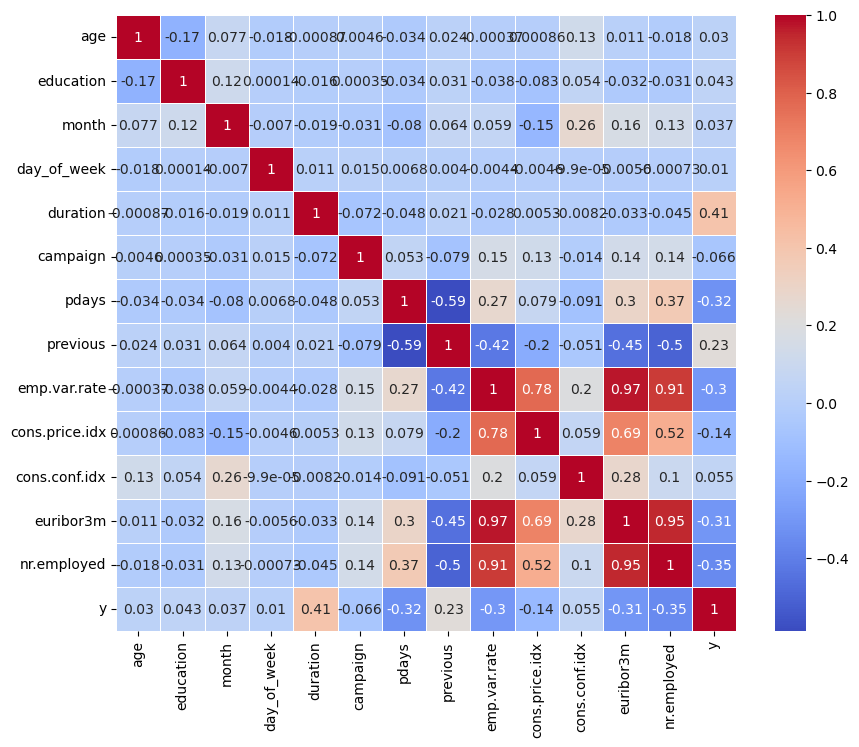

In [27]:
# Correlation Matrix
correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [28]:
df1_column_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary"),
     df1.select_dtypes(include='object').columns),
    verbose_feature_names_out=False,
    remainder=StandardScaler())

In [29]:
# train and test split on df1
def df1_train_test_split(df):
    X1 = df.drop('y', axis=1)
    y1 = df['y']
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
    return X1_train, X1_test, y1_train, y1_test

In [30]:
# Feature ranking to identify the least important features
X1_train, X1_test, y1_train, y1_test = df1_train_test_split(df1)
rfe = RFE(LogisticRegression(), n_features_to_select=1)

rfe_model = Pipeline([('preprocessor', df1_column_transformer), ('rfe', rfe)])

rfe_model.fit(X1_train, y1_train)

feature_ranking = rfe.ranking_
# Create a DataFrame to display feature rankings
feature_ranking_df1 = pd.DataFrame({
    'Feature': df1_column_transformer.get_feature_names_out(), 
    'Ranking': feature_ranking
})
feature_ranking_df1 = feature_ranking_df1.sort_values(by='Ranking')

/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [31]:
feature_ranking_df1.tail(10)

,Feature,Ranking
21,housing_yes,33
20,housing_unknown,34
23,loan_unknown,35
22,loan_no,36
27,poutcome_nonexistent,37
4,job_management,38
14,marital_single,39
29,age,40
36,previous,41
32,day_of_week,42


In [32]:
# removing the three of the least important features
df1.drop(columns=['age','previous', 'day_of_week'], inplace=True)

In [33]:
X1_train, X1_test, y1_train, y1_test = df1_train_test_split(df1)

In [34]:
preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"),
     df1.select_dtypes(include='object').columns),
    verbose_feature_names_out=False,
    remainder=StandardScaler())

In [35]:
# GridSearch for Logistic Regression

# Create a logistic regression model
logistic_model = Pipeline([('preprocessor', preprocessor), ('logisticregression', LogisticRegression())])

# Define hyperparameters and their potential values
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)


/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         Index(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [36]:
# Print the best hyperparameters
print("Logistic Regression Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
lr1_test_accuracy = best_model.score(X1_test, y1_test)
lr1_train_accuracy = best_model.score(X1_train, y1_train)

Logistic Regression Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


In [37]:
def find_best_fit_time(grid_serach):
    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Find the index of the best parameters in the cv_results_ array
    best_index = grid_search.cv_results_['params'].index(best_params)
    # Access the fit time for the best estimator
    lr_best_fit_time = grid_search.cv_results_['mean_fit_time'][best_index]
    return lr_best_fit_time

In [38]:
# creating dataframe for iteration 2 model comparision
itr2_model_comparision = pd.DataFrame(columns = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [39]:
itr2_model_comparision.loc[0] = [
    'Logistic Regresion',
    find_best_fit_time(grid_search),
    lr1_train_accuracy,
    lr1_test_accuracy
]

In [40]:
# Grid Search for Decision Tree
# Define hyperparameters and their potential values
param_grid = dict(classifier__criterion = ['gini','entropy'],classifier__max_depth = [5, 10, 15, 20, 25, 30])


decision_tree1_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', DecisionTreeClassifier(random_state=42))])

# Create a GridSearchCV object
dt_grid_search = GridSearchCV(decision_tree1_model, param_grid, cv=5, scoring='accuracy')


# Fit the grid search to the data
dt_grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters
print("DecisionTree Best Hyperparameters:", dt_grid_search.best_params_)

# Get the best model
dt_best_model = dt_grid_search.best_estimator_

# Evaluate the best model on the test set
dt1_test_accuracy = dt_best_model.score(X1_test, y1_test)
dt1_train_accuracy = dt_best_model.score(X1_train, y1_train)

DecisionTree Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5}


In [41]:
best_params = dt_grid_search.best_params_

# Find the index of the best parameters in the cv_results_ array
best_index = dt_grid_search.cv_results_['params'].index(best_params)
# Access the fit time for the best estimator
lr_best_fit_time = dt_grid_search.cv_results_['mean_fit_time'][best_index]

itr2_model_comparision.loc[2] = [
    'Decision Tree',
    lr_best_fit_time,
    dt1_train_accuracy,
    dt1_test_accuracy
]

In [42]:
# GridsearchCV for KNN
# Create a KNN model with a pipeline including StandardScaler
knn1_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('knn', KNeighborsClassifier())])

# Define hyperparameters and their potential values
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a GridSearchCV object
knn_grid_search = GridSearchCV(knn1_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
knn_grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters
print("KNN Best Hyperparameters:", knn_grid_search.best_params_)

# Get the best model
best_knn_model = knn_grid_search.best_estimator_

# Evaluate the best model on the test set
KNN1_test_accuracy = best_knn_model.score(X1_test, y1_test)
KNN1_train_accuracy = best_knn_model.score(X1_train, y1_train)

KNN Best Hyperparameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


In [43]:
knn_best_params = knn_grid_search.best_params_

# Find the index of the best parameters in the cv_results_ array
best_index = knn_grid_search.cv_results_['params'].index(knn_best_params)
# Access the fit time for the best estimator
knn_best_fit_time = knn_grid_search.cv_results_['mean_fit_time'][best_index]

itr2_model_comparision.loc[1] = [
    'KNN',
    knn_best_fit_time,
    KNN1_train_accuracy,
    KNN1_test_accuracy
]

In [44]:
# GridsearchCV for SVM
# Create an SVM model with a pipeline including StandardScaler
svm_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('svc', SVC())])

# Define hyperparameters and their potential values
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
svm_grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
svm_grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters
print("SVM Best Hyperparameters:", svm_grid_search.best_params_)

# Get the best model
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the best model on the test set
svm_test_accuracy = best_svm_model.score(X1_test, y1_test)
svm_train_accuracy = best_svm_model.score(X1_train, y1_train)

SVM Best Hyperparameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [46]:
svm_best_params = svm_grid_search.best_params_

# Find the index of the best parameters in the cv_results_ array
best_index = svm_grid_search.cv_results_['params'].index(svm_best_params)
# Access the fit time for the best estimator
svm_best_fit_time = svm_grid_search.cv_results_['mean_fit_time'][best_index]

itr2_model_comparision.loc[3] = [
    'SVM',
    svm_best_fit_time,
    svm_train_accuracy,
    svm_test_accuracy
]

Conclusion:

After the first iteration the model comparison results show the logistic regression and SVM models performs better. Logistic regression which yields high score, and minimal degradation in train score, with less fit time. Whereas, SVM has shows almost same score, but has hight fit time compare to any other model.

The results of the first model taking in consideration, when number of features increases the complexity increases, so it is important to reduce the unwanted features to improve the fit time. One of the approach is, applying ordinal encoding method for some features where there is clear hierarchical in nature, such as day_of_week, month, and education. Which reduces the number of features compare to first iteration where hot encoding used. The other approach is Recursive feature elimination, and correlation matrix to help identifying the least important features and remove.Finally, finding best hyperparameters using grid search to tune model.

In [50]:
print("First Iteration model comparision")
model_comparison

First Iteration model comparision


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.830537,0.911836,0.911386
1,KNN,0.114194,0.926859,0.900461
2,Decission Tree,0.338682,1.000000,0.886380
3,SVM,23.552911,0.922701,0.911629


In [51]:
print("Second Iteration model comparision")
itr2_model_comparision

Second Iteration model comparision


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regresion,0.714989,0.910379,0.910658
2,Decision Tree,0.109795,0.916055,0.914907
1,KNN,0.073933,0.918816,0.901068
3,SVM,116.572964,0.917420,0.908958


Recommendation: 

After some feature engineering, and reduction, and hyperparameter tuning, the training time is reduce significantly in KNN and Decision Tree models, and slightly better for logistic regression. Whereas, SVM training time is significantly increased.

Finally, after the second iteration Logistic regression and Decision Tree models are performing significantly well, similarly, KNN is performance is close to other two models. Out of these three models, Decision Tree is clearly the best model for this problem as it has hight accuracy and less training time.

##### Questions